In [40]:
#import dependencies
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
#read csv 
animal_data = pd.read_csv("Animal Shelter skinniest.csv", sep=',', encoding='latin-1')
animal_data = animal_data.fillna(0)
animal_data.head()

,index1,index2,index3,County,Year,ShelterID,BusName,City,Zip,License Type,...,BegInvOther,OtherRec,OtherAdopt,OtherReclaim,OtherEuth,EndInvOther,AllRec,AllAdopt,AllReclaim,AllEuth
0,0,0,0,Adams,2012.0,5531,Adams County Animal Shelter,Quincy,62305,Animal Control,...,0.0,1.0,0.0,1.0,0.0,0,142.0,82.0,60.0,1.0
1,1,1,1,Adams,2010.0,5531,Adams County Animal Shelter,Quincy,62305,Animal Control,...,0.0,10.0,4.0,1.0,5.0,0,331.0,253.0,66.0,12.0
2,2,2,2,Adams,2011.0,5531,Adams County Animal Shelter,Quincy,62305,Animal Control,...,0.0,10.0,1.0,0.0,9.0,0,267.0,154.0,95.0,18.0
3,3,3,3,Adams,2014.0,5531,Adams County Animal Shelter,Quincy,62305,Animal Control,...,0.0,1.0,1.0,0.0,0.0,0,197.0,78.0,86.0,9.0
4,4,4,4,Adams,2012.0,13357,City of Quincy Animal Shelter,Quincy,62301,Animal Control,...,0.0,6.0,4.0,0.0,2.0,0,1029.0,521.0,286.0,222.0


In [2]:
#Sum of Recieved, Adopted, Reclaim, and Euth
TotalRecieved = animal_data['AllRec'].sum()
TotalAdopted = animal_data['AllAdopt'].sum()
TotalReclaim = animal_data['AllReclaim'].sum()
TotalKilled = animal_data['AllEuth'].sum()

print(TotalRecieved)
print(TotalAdopted)
print(TotalReclaim)
print(TotalKilled)

1017935.0
498999.0
107452.0
281895.0


<function matplotlib.pyplot.show(*args, **kw)>

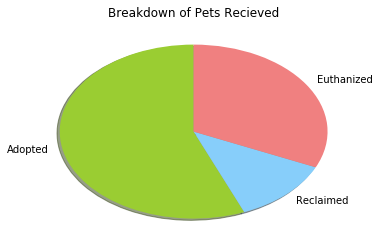

In [13]:
#Make pie graph
categories = ('Adopted',
          'Reclaimed',
          'Euthanized')
totals = [ TotalAdopted, TotalReclaim, TotalKilled]
colors = ['yellowgreen','lightskyblue','lightcoral']

fig1, ax1 = plt.subplots()
ax1.pie(totals, colors=colors, shadow = True, startangle= 90, labels=categories)
plt.title('Breakdown of Pets Recieved')

plt.savefig('piechart.png')
plt.show

In [4]:
#Breakdown by Type
DogsAdopt = animal_data['DogAdopt'].sum()
DogsReclaim = animal_data['DogReclaim'].sum()
DogsEuth = animal_data['DogEuth'].sum()

# print(DogsAdopt)
# print(DogsReclaim)
# print(DogsEuth)

CatsAdopt = animal_data['CatsAdopt'].sum()
CatsReclaim = animal_data['CatsReclaim'].sum()
CatsEuth = animal_data['CatEuth'].sum()

# print(CatsAdopt)
# print(CatsReclaim)
# print(CatsEuth)

OtherAdopt = animal_data['OtherAdopt'].sum()
OtherReclaim = animal_data['OtherReclaim'].sum()
OtherEuth = animal_data['OtherEuth'].sum()

print(OtherAdopt)
print(OtherReclaim)
print(OtherEuth)

13845.0
667.0
17618.0


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

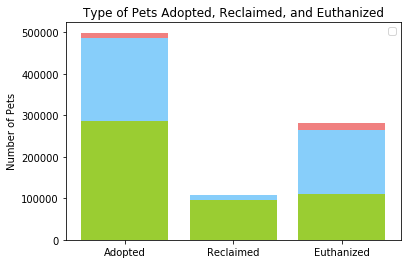

In [14]:
#Make stacked bar graph for adopted, reclaimed, and euth by ty
DogBar = [286327, 95045, 109898]
CatBar = [198522, 12121, 154693]
OtherBar = [13845, 667, 17618]
x = np.arange(len(DogBar))

plt.bar(x, DogBar, color = 'yellowgreen', align='center')
plt.bar(x, CatBar, color = 'lightskyblue', bottom=DogBar)
plt.bar(x,OtherBar, color = 'lightcoral', bottom = list(map(lambda x,y: x+y, DogBar, CatBar)))

categories = ['Adopted',
             'Reclaimed',
             'Euthanized']
plt.title('Type of Pets Adopted, Reclaimed, and Euthanized')
plt.ylabel('Number of Pets')
plt.xticks(x, categories)
plt.legend(loc='best')
plt.savefig('stackedbarchart.png')
plt.show

In [12]:
#Make stacked bar graph for adopted, reclaimed, and euth by type
# totals = [ '498999', '107452', '281895']
# y_pos = np.arange(len(totals))
# categories = (
#           'TotalAdopted',
#           'TotalReclaim',
#           'TotalKilled')

# plt.bar(y_pos, totals, color = 'r', alpha = 0.5, align = 'center')
# plt.xticks(y_pos, categories)
# plt.ylabel('Number of Pets')
# plt.title('Type of Pets Adopted, Reclaimed, and Euthanized')

# plt.show

In [31]:
# 3)   Illinois trends for intake, adoption, return to owner, and euthanasia of pets
#      - adoption, return to owner, and euthanasia rates
#      - dogs, cats, others in own charts, color coded, dashed
# DogAdoptYears = animal_data.groupby('Year')['DogAdopt'].sum()
# DogReclaimYears = animal_data.groupby('Year')['DogReclaim'].sum()
# DogEuthYears = animal_data.groupby('Year')['DogReclaim'].sum()
# print(DogAdoptYears, DogReclaimYears, DogEuthYears)

# CatAdoptYears = animal_data.groupby('Year')['CatsAdopt'].sum()
# CatReclaimYears = animal_data.groupby('Year')['CatsReclaim'].sum()
# CatEuthYears = animal_data.groupby('Year')['CatEuth'].sum()
# print(CatAdoptYears, CatReclaimYears, CatEuthYears)

# OtherAdoptYears = animal_data.groupby('Year')['OtherAdopt'].sum()
# OtherReclaimYears = animal_data.groupby('Year')['OtherReclaim'].sum()
# OtherEuthYears = animal_data.groupby('Year')['OtherEuth'].sum()
# print(OtherAdoptYears, OtherReclaimYears, OtherEuthYears)

SumAdoptYears = DogAdoptYears + CatAdoptYears + OtherAdoptYears
print(SumAdoptYears)

SumReclaimYears = DogReclaimYears + CatReclaimYears + OtherReclaimYears
print(SumReclaimYears)

SumEuthYears = DogEuthYears + CatEuthYears + OtherEuthYears
print(SumEuthYears)

Year
2007.0       378.0
2008.0       450.0
2009.0       584.0
2010.0     59371.0
2011.0     59841.0
2012.0    116975.0
2013.0    127185.0
2014.0    133910.0
dtype: float64
Year
2007.0      191.0
2008.0      140.0
2009.0      228.0
2010.0    18534.0
2011.0    16657.0
2012.0    24319.0
2013.0    22483.0
2014.0    25281.0
dtype: float64
Year
2007.0      437.0
2008.0      240.0
2009.0      507.0
2010.0    51275.0
2011.0    44720.0
2012.0    54445.0
2013.0    58408.0
2014.0    57324.0
dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

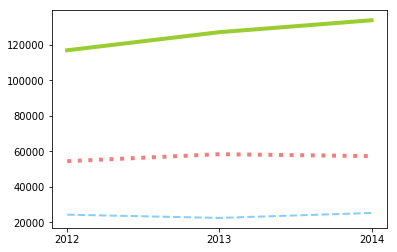

In [44]:
#Line Values 
GraphEuth = [54445, 58408, 57324]
GraphReclaim = [24319, 22483, 25281]
GraphAdopt = [116975, 127185, 133910] 

#x Values
years = ['2012','2013','2014']

#plotting on graph
plt.plot(GraphAdopt, color='yellowgreen', linewidth=4)
plt.plot(GraphReclaim, color='lightskyblue', linewidth=2, linestyle = 'dashed')
plt.plot(GraphEuth, color='lightcoral', linewidth=4, linestyle = 'dotted')

#graph lables
plt.title = ['Trends Between 2012-2014']
plt.xlabel = ['Year']
plt.ylabel = ['Number of Animals']
plt.xticks(np.arange(len(years)), years)
#Why aren't the title or labels being shown?
plt.show

In [46]:
#Graph for Dogs
DogAdoptYears = animal_data.groupby('Year')['DogAdopt'].sum()
DogReclaimYears = animal_data.groupby('Year')['DogReclaim'].sum()
DogEuthYears = animal_data.groupby('Year')['DogReclaim'].sum()
print(DogAdoptYears, DogReclaimYears, DogEuthYears)


Year
2007.0      305.0
2008.0      223.0
2009.0      392.0
2010.0    35678.0
2011.0    35516.0
2012.0    66815.0
2013.0    72860.0
2014.0    74538.0
Name: DogAdopt, dtype: float64 Year
2007.0      167.0
2008.0      103.0
2009.0      174.0
2010.0    16975.0
2011.0    14717.0
2012.0    21361.0
2013.0    19225.0
2014.0    22323.0
Name: DogReclaim, dtype: float64 Year
2007.0      167.0
2008.0      103.0
2009.0      174.0
2010.0    16975.0
2011.0    14717.0
2012.0    21361.0
2013.0    19225.0
2014.0    22323.0
Name: DogReclaim, dtype: float64
